In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Custom function & Built-in Dilation

In [ ]:
def dilation(image, kernelSize=3):
    dilatedImage = image.copy()  # To prevent modifying the original image
    k = kernelSize // 2
    paddedImage = np.pad(image, ((k, k), (k, k)), mode='constant', constant_values=0)

    for i in range(1, dilatedImage.shape[0] - 1):
        for j in range(1, dilatedImage.shape[1] - 1):
            if (
                any(image[i + d, j] == 255 for d in range(-k, k + 1))  # To get the vertical neighbors
                or any(image[i, j + d] == 255 for d in range(-k, k + 1))  # To get the horizontal neighbors
            ):
                dilatedImage[i, j] = 255

    return dilatedImage

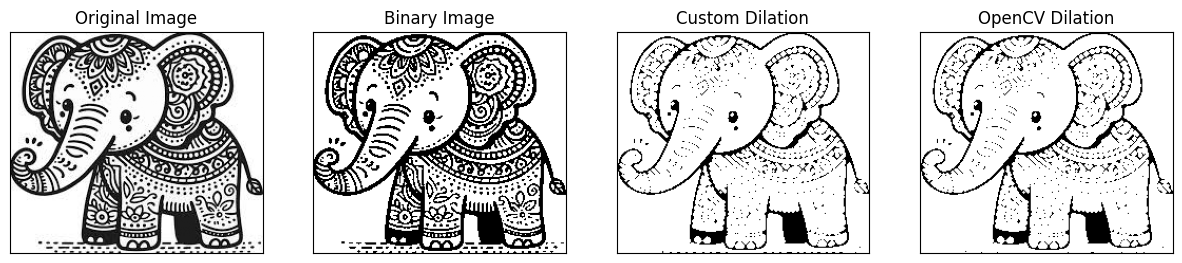

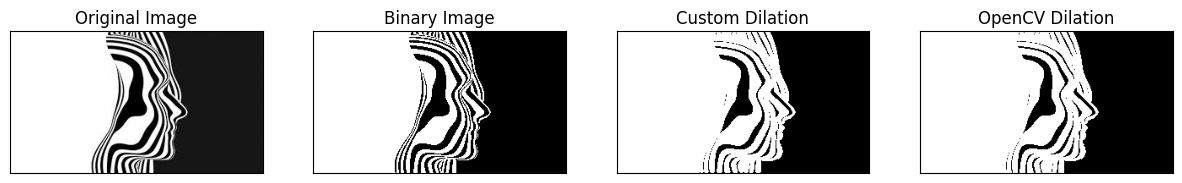

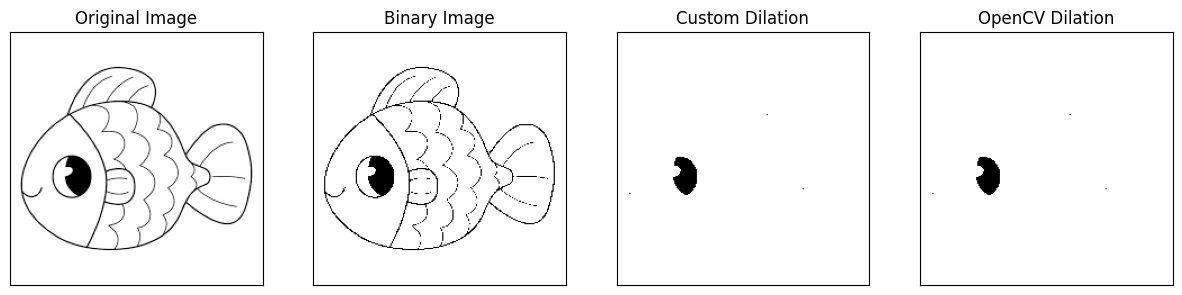

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imageFilenames = ["img_1.jpg", "img_2.jpg", "img_3.png"]
kernelSize = 3

crossKerenl = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

for imgName in imageFilenames:
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)

    # Convert to binary (0 & 255)
    _, binaryImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    dilatedImg = dilation(binaryImg, kernelSize)

    cvDilated = cv2.dilate(binaryImg, crossKerenl, iterations=1)

    titles = ['Original Image', 'Binary Image', 'Custom Dilation', 'OpenCV Dilation']
    images = [img, binaryImg, dilatedImg, cvDilated]

    # Visualize the results
    plt.figure(figsize=(15, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()


The custom is almost the same as the built-in. The difference here appears only in the first image, in the elephant feet, and this most probably because of the padding.

#Custom function & Built-in Erosion

In [ ]:
def erosion(image, kernelSize=3):
    k = kernelSize // 2
    erodedImage = image.copy()

    for i in range(1, erodedImage.shape[0] - 1):
        for j in range(1,  erodedImage.shape[1]- 1):
            if all(image[i + d, j] == 255 for d in range(-k, k + 1)) and all(image[i, j + d] == 255 for d in range(-k, k + 1)):
                erodedImage[i, j] = 255  #If the condition is met, leave the pixel white
            else:
                erodedImage[i, j] = 0  #Else make it black

    return erodedImage

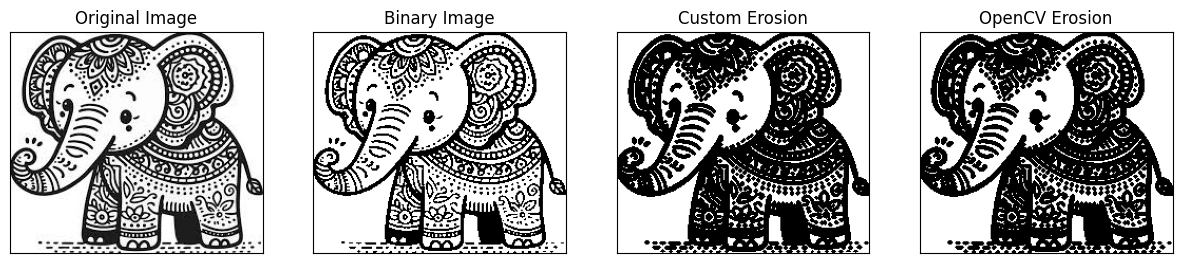

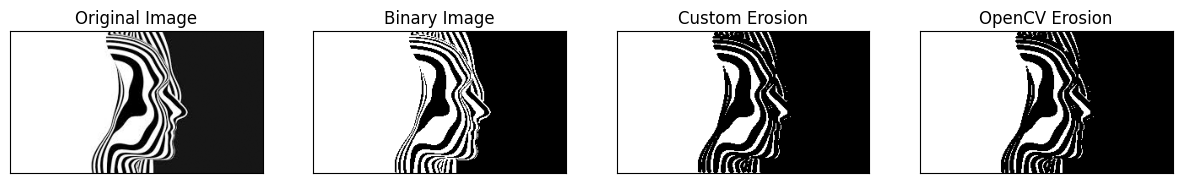

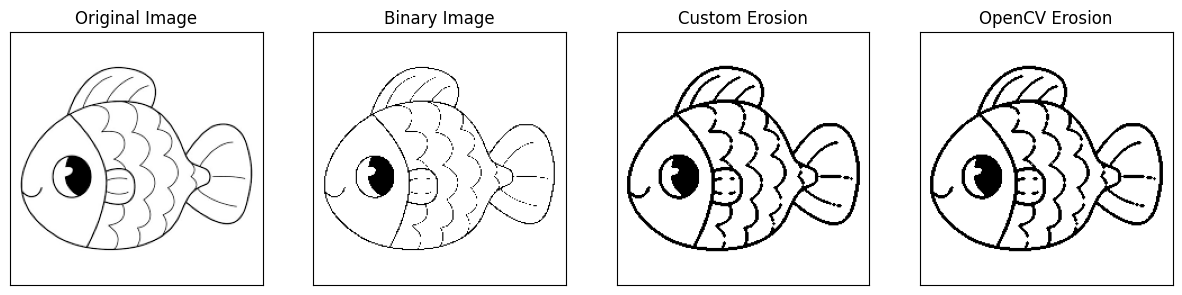

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imageFilenames = ["img_1.jpg", "img_2.jpg", "img_3.png"]
kernelSize = 3

crossKernel = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

for imgName in imageFilenames:
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)

    _, binaryImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    erodedImg = erosion(binaryImg, kernelSize)

    cvEroded = cv2.erode(binaryImg, crossKernel, iterations=1)

    titles = ['Original Image', 'Binary Image', 'Custom Erosion', 'OpenCV Erosion']
    images = [img, binaryImg, erodedImg, cvEroded]

    plt.figure(figsize=(15, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()




> The custom function is the same as the built-in.



#Custom & Built-in Opening

In [ ]:
def opening(image,kernel_size = 3):
  return dilation(erosion(image,kernel_size),kernel_size)

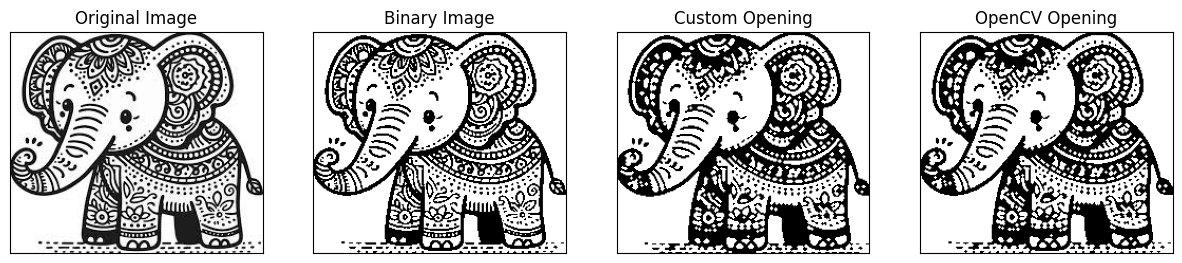

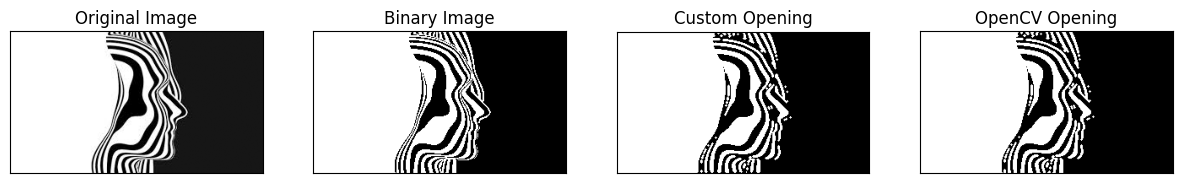

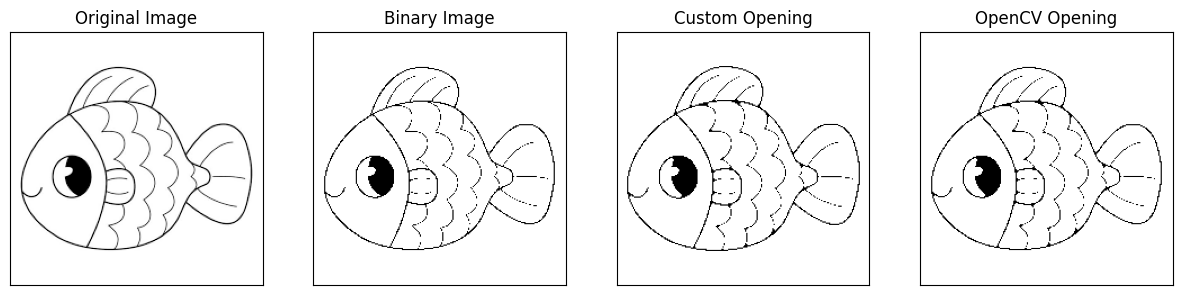

In [ ]:
imageFilenames = ["img_1.jpg", "img_2.jpg", "img_3.png"]
kernelSize = 3

crossKernel = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

for imgName in imageFilenames:
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)
    _, binaryImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    openedImg = opening(binaryImg, kernelSize)
    cvOpened = cv2.morphologyEx(binaryImg, cv2.MORPH_OPEN, crossKernel)

    openingTitles = ['Original Image', 'Binary Image', 'Custom Opening', 'OpenCV Opening']
    openingImages = [img, binaryImg, openedImg, cvOpened]

    plt.figure(figsize=(15, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(openingImages[i], cmap='gray')
        plt.title(openingTitles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()




> The built-in function works exactly the same as the custom function.



# Custom & Built-in Closing

In [ ]:
def closing(image, kernel_size=5):
    return erosion(dilation(image, kernel_size), kernel_size)

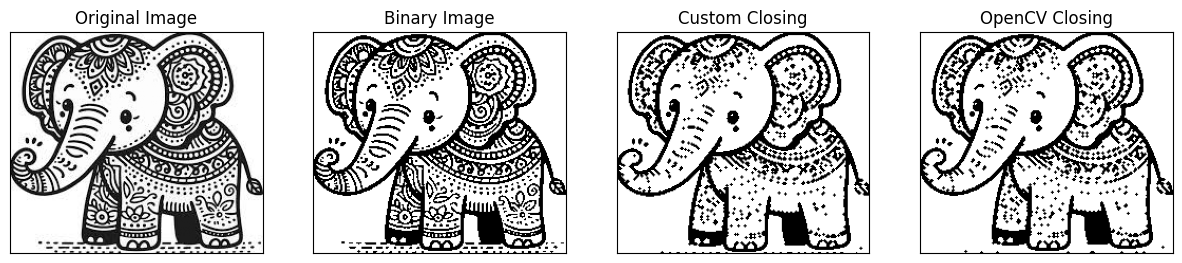

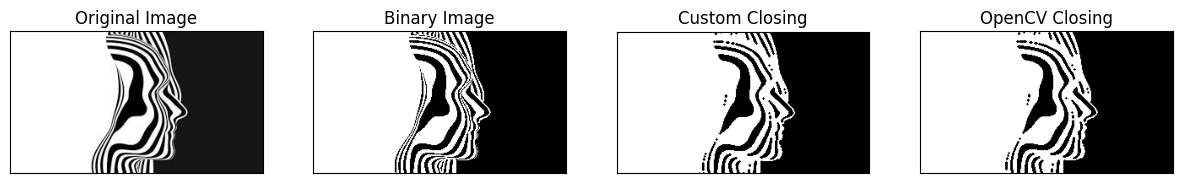

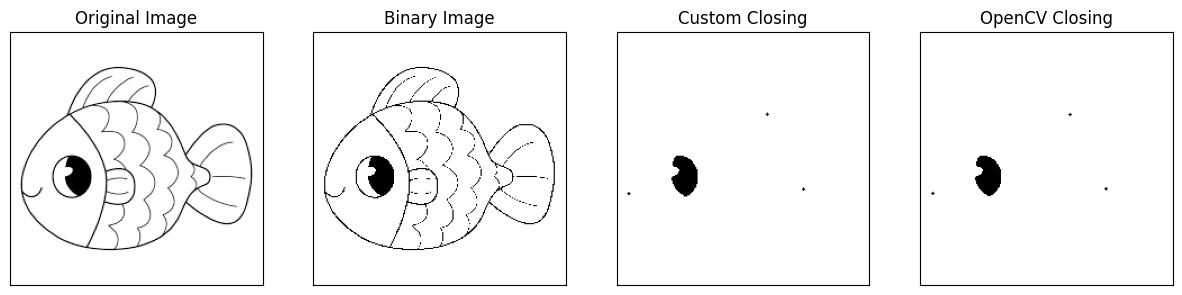

In [ ]:
imageFilenames = ["img_1.jpg", "img_2.jpg", "img_3.png"]
kernelSize = 3

crossKernel = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

for imgName in imageFilenames:
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)
    _, binaryImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    closedImg = closing(binaryImg, kernelSize)
    cvClosed = cv2.morphologyEx(binaryImg, cv2.MORPH_CLOSE, crossKernel)

    closingTitles = ['Original Image', 'Binary Image', 'Custom Closing', 'OpenCV Closing']
    closingImages = [img, binaryImg, closedImg, cvClosed]

    plt.figure(figsize=(15, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(closingImages[i], cmap='gray')
        plt.title(closingTitles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()




> Both the built-in and the custom function delivered the same output.

